# Capstone Proyect

## Introduction

In the current project, we are going to analyse road accidents. 
Road accidents happen every minute and causes huge losses, both human lives and economical.
How can we prevent those accidents? By studiyng the causes of the crashes, we can identify what where the factors that have the greater impact. After that, we can implement solutions based on this causes to prevent more accidents to happen.

## Data 

There is available an extensive data set from the Seattle Police Department, with over 190,000 observations collected over the last 15+ years.

We will use the most relevant variables that make the greatest impact on the acidents to be implemented in the model.

## Methodology

Using Jupyter Notebooks

Importing the Pandas (data structure), Matploblib (Plots), Seaborn (Plots) and Numpy (arrays) libraries.

Transforming the data and selecting the variables that have sense and have singnificant number of not missing data

Using machine learning models: K-Nearest Neighbor (KNN), Decision Trees and Logistic Regression

Using data visualizations to present the results to the stakeholders


## Results

In [58]:
import pandas as pd
car_accidents = pd.read_csv("C:/Users/AirLavic/Downloads/data-collisions.csv")
car_accidents.head()

C:\Users\AirLavic\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [59]:
car_accidents.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [60]:
car_accidents.describe

<bound method NDFrame.describe of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
...              ...         ...        ...       ...     ...        ...   
194668             2 -122.290826  47.565408    219543  309534     310814   
194669             1 -122.344526  47.690924    219544  309085     310365   
194670             2 -122.306689  47.683047    219545  311280     312640   
194671             2 -122.355317  47.678734    219546  309514     310794   
194672             1 -122.289360  47.611017    219547  308220     309500   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  ... 

In [61]:
## We check some variable to count the missing values
car_accidents['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [62]:
car_accidents['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [86]:
## As car accidents, weather and road conditions have a lot of missing values, we drop the variables as follows:
car_accidents.drop('PEDROWNOTGRNT', axis=1, inplace=True)
car_accidents.drop('SPEEDING', axis=1, inplace=True)
car_accidents.drop('INATTENTIONIND', axis=1, inplace=True)
car_accidents.drop('INTKEY', axis=1, inplace=True)
car_accidents.drop(['Accident_Severity'], axis=1)

KeyError: "['Accident_Severity'] not found in axis"

In [87]:
def normalize(z):
    x = z.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(np.vstack(x))
    return x_scaled

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from statistics import mode
from collections import Counter
import warnings
import matplotlib.pyplot as plt


In [89]:
for i in range(0,9):
    car_accidents.iloc[:,i]=normalize(car_accidents.iloc[:,i])

ValueError: could not convert string to float: 'E874948'

Text(0.5, 1.0, 'Total vehicles accidented')

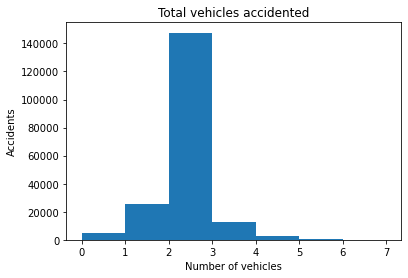

In [63]:
import numpy as np
import matplotlib.pyplot as plt

bins=np.arange(car_accidents.PERSONCOUNT.min(),8,1)
plt.hist(car_accidents.VEHCOUNT, bins=bins)

plt.xlabel("Number of vehicles")
plt.ylabel("Accidents")
plt.title("Total vehicles accidented")

In [ ]:
## As we can see, most accidents have 2 vehicles accidented

Text(0.5, 1.0, 'Total people accidented')

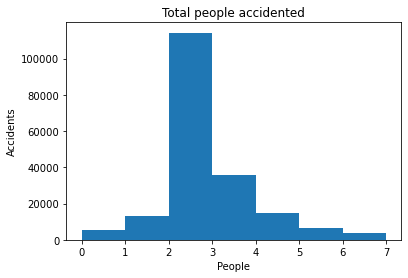

In [64]:
bins=np.arange(car_accidents.PERSONCOUNT.min(),8,1)
plt.hist(car_accidents.PERSONCOUNT, bins=bins)

plt.xlabel("People")
plt.ylabel("Accidents")
plt.title("Total people accidented")

In [ ]:
## As we can see, most accidents have 2 people accidented, 1 person per car.

In [65]:
## Now, we get into detail. K Nearest Neighbour (KNN) construction

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(car_accidents, car_accidents, test_size=0.33, random_state=0)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
k=10
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
knn_y_pred[0:5]

ValueError: could not convert string to float: 'E437249'

In [51]:
## KNN evaluation

jaccard_score(y_test, knn_y_pred)
f1_score(y_test, knn_y_pred, average='macro')

NameError: name 'jaccard_score' is not defined

In [52]:
## Decision Tree construction

from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier (criterion="entropy", max_depth=6)

dt.fit(X_train, y_train)

ValueError: could not convert string to float: 'E437249'

In [ ]:
## Decision Tree evaluation

jaccard_score(y_test, dt_y_pred)
f1_score(y_test, dt_y_pred, average='macro')

In [90]:
## Linear Regression construction

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR=LogisticRegression (C=6, solver="liblinear").fit(X_train,y_train)

ValueError: could not convert string to float: 'N'

## Discussion

In the beginning of this notebook, we had categorical data and imbalance data. Fistly, we solved this two problems.
Once we analyzed and cleaned the data, it was then fed through three Machine Learning models; K-Nearest Neighbor, Decision Tree and Logistic Regression. logistic regression made most sense because of its binary nature.
Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyparameter C values helped to improve our accuracy to be the best possible.

## Result

Most crashes happened in clear, dry, and bright conditions. Most days are clear, dry, and bright, so it’s no surprise that most car crashes occur under these conditions. 

I also found out that crashes with a distracted driver or an impaired driver are statistically more likely to result in injury, which is also not a surprise. The results of the data indicate to city officials that they should ask drivers to be more alert in ideal conditions.

Thanks :)